In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

In [2]:
%pip install open_clip_torch

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
import clip
from clip import clip
import torch.nn as nn
import open_clip


# Load the pre-trained OpenCLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
tokenizer = open_clip.get_tokenizer('ViT-B-32')

text_embeded = tokenizer(["trying 1234 "])
print(text_embeded)


tensor([[49406,  2551,   272,   273,   274,   275, 49407,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]])


In [4]:
def create_image_embedding(image_path):
  try:
    image = Image.open(image_path).convert('RGB')
    input_image = preprocess(image).unsqueeze(0)
    with torch.no_grad():
      embedding = model.encode_image(input_image).reshape(512)
      return embedding.detach().numpy()
  except Exception as e:
    print("Error:", e)
    return None

In [5]:
def create_text_embedding(text):
    try:   
        text_embedding = tokenizer(text)        
        # Generate text embeddings
        with torch.no_grad():
            text_embedding = model.encode_text(text_embedding).reshape(512)            
            return text_embedding.cpu().numpy()
    except Exception as e:
        print("Error:", e)
        return None


In [6]:
text = "A description of the image content goes here."

text_embedding = create_text_embedding(text)
print(text_embedding.shape)


(512,)


In [7]:
# Example usage
image_path = "./images/cat1.jpg"
cat1 = create_image_embedding(image_path)

# 'embedding' now contains a dense vector representation of the image
print("Image Embedding Shape:", cat1.shape)
print("Image Embedding:", cat1)

Image Embedding Shape: (512,)
Image Embedding: [ 1.28094345e-01 -2.87561476e-01  6.92977309e-02 -5.93811274e-01
 -1.93212286e-01 -4.70223993e-01  1.96753040e-01  4.96615618e-01
  3.78718495e-01 -1.91316202e-01  5.63167453e-01 -2.11192667e-01
  6.58787727e-01 -5.59608877e-01  5.13251960e-01  2.40769863e-01
  6.42282307e-01  1.32430032e-01  2.48115852e-01  1.76041603e-01
  1.21062443e-01  1.51161313e-01  6.08852088e-01 -6.52013779e-01
 -7.11656034e-01  9.26592946e-02  3.25618982e-01  3.90735269e-02
 -1.58952251e-01 -1.14376552e-01  2.75573194e-01  9.91618931e-02
  3.21438253e-01  3.38551790e-01  9.80929136e-02  4.06147301e-01
  9.01833922e-03 -2.67207384e-01  3.77570033e-01  1.16246057e+00
 -1.30993277e-01 -4.63512778e-01  6.33193702e-02 -3.04862678e-01
 -1.18975334e-01 -7.60275364e-01 -2.21933991e-01  1.82356670e-01
  1.47248372e-01 -4.46383476e-01  1.34153247e-01  4.67323303e-01
  4.41025734e-01 -1.21388227e-01 -7.56559521e-02 -1.13059990e-01
  2.83470988e-01  8.52067232e-01  1.2503519

In [8]:
image_path = "./images/cat2.jpg"
cat2 = create_image_embedding(image_path)

# 'embedding' now contains a dense vector representation of the image
print("Image Embedding Shape:", cat2.shape)
print("Image Embedding:", cat2)

Image Embedding Shape: (512,)
Image Embedding: [-1.67901918e-01 -3.12842220e-01  1.41124785e-01 -3.78722578e-01
 -1.56136379e-01 -4.10442203e-01  2.51151502e-01  3.61296982e-01
  7.44947791e-02 -1.14467487e-01  2.88969278e-02 -5.36056459e-01
  5.65906286e-01 -3.10917825e-01  7.83205092e-01  7.82752782e-03
  6.19995594e-03  4.81871627e-02  6.91310525e-01  3.09708834e-01
 -3.41811955e-01  6.45062208e-01  7.49427557e-01 -3.61969978e-01
 -8.67335796e-01 -5.52286953e-02  5.37855744e-01 -4.32996005e-02
 -1.47821784e-01  9.04784203e-02 -4.66757789e-02  7.55695105e-02
 -6.20557070e-02  1.19816646e-01  4.16917503e-01  3.32900763e-01
  2.39664152e-01  9.54498351e-02  4.69703712e-02  1.25315475e+00
 -3.70679498e-01 -5.67893624e-01  1.16490126e-02 -2.00154826e-01
  2.01315165e-01 -6.82422996e-01  5.19988313e-03 -1.71179324e-01
  5.01254916e-01 -3.01333189e-01  1.79712802e-01  2.66737461e-01
  1.03748053e-01 -7.38289058e-02 -1.59653127e-02  1.33017719e-01
  1.25721753e-01  8.00844014e-01 -9.6753835

In [9]:
dog1 = create_image_embedding("./images/dog1.jpg")
dog2 = create_image_embedding("./images/dog2.jpg")
dog3 = create_image_embedding("./images/dog3.jpg")
person1 = create_image_embedding("./images/person1.jpg")
person2 = create_image_embedding("./images/person2.jpg")
person3 = create_image_embedding("./images/person3.jpg")
phone1= create_image_embedding("./images/phone1.jpg")
telephone2= create_image_embedding("./images/telephone2.jpg")
dcat1 = create_text_embedding("a cute grey cat")
dcat2 = create_text_embedding("a cute cat with blue eyes")
ddog1 = create_text_embedding("a golden retriver cute dog")
ddog2 = create_text_embedding("a cute dog smiling")
ddog3 = create_text_embedding("a cute golden retriever dog with goggles")
dperson1 = create_text_embedding("a female person with red hair")
dperson2 = create_text_embedding("a black person smiling")
dperson3 = create_text_embedding("a chinese person smiling")
dphone1= create_text_embedding("an iphone phone ")
dtelephone2= create_text_embedding("a bleu android phone")

In [10]:
person1.shape

(512,)

In [11]:
#Imports a PyMilvus package:
from pymilvus import (
    connections,
    utility,
    FieldSchema,
    CollectionSchema,
    DataType,
    Collection,
)

In [12]:
#Connect to the Milvus
connections.connect("default", host="localhost", port="19530")

In [13]:
#Creates a collection:
fields = [
    FieldSchema(name="pk", dtype=DataType.INT64, is_primary=True, auto_id=False),
    FieldSchema(name="words", dtype=DataType.VARCHAR, max_length=50),
    FieldSchema(name="image_embeddings", dtype=DataType.FLOAT_VECTOR, dim=512)
]
dfields = [
    FieldSchema(name="pk", dtype=DataType.INT64, is_primary=True, auto_id=False),
    FieldSchema(name="words", dtype=DataType.VARCHAR, max_length=50),
    FieldSchema(name="description_embeddings", dtype=DataType.FLOAT_VECTOR, dim=512)
]
schema = CollectionSchema(fields, "Simple demo collection image")
image = Collection("found_objects_image", schema)

schema = CollectionSchema(dfields, "Simple demo collection description")
description = Collection("found_objects_description", schema)

In [14]:
# Builds indexes on the entities:

index = {
    "index_type": "IVF_FLAT",
    "metric_type": "L2",
    "params": {"nlist": 128},
}

dindex = {
    "index_type": "IVF_FLAT",
    "metric_type": "L2",
    "params": {"nlist": 128},
}
image.create_index("image_embeddings", index)
description.create_index("description_embeddings", dindex)

alloc_timestamp unimplemented, ignore it


alloc_timestamp unimplemented, ignore it


Status(code=0, message=)

In [15]:
#Insert data in collection
data = [
    [1,2,3,4,5,6,7,8,9],  # field pk
    ['cat1','cat2','dog1','dog2','dog3','person1','person2','phone1','telephone2'],  # field words
    [cat1, cat2, dog1, dog2, dog3, person1, person2, phone1, telephone2],  # field embeddings
]

ddata = [
    [1,2,3,4,5,6,7,8,9],  # field pk
    ['cat1','cat2','dog1','dog2','dog3','person1','person2','phone1','telephone2'],  # field words
    [dcat1, dcat2, ddog1, ddog2, ddog3, dperson1, dperson2, dphone1, dtelephone2],  # field embeddings
]

In [16]:
image.insert(data)
image.flush()
image.load()

description.insert(ddata)
description.flush()
description.load()

In [17]:
search_params = {"metric_type": "L2"}


In [18]:
results = description.search(
	data=[ddog1], 
	anns_field="description_embeddings", 
	param=search_params,
	limit=4, 
	expr=None,
	# set the names of the fields you want to retrieve from the search result.
	output_fields=['words'],
	consistency_level="Strong"
)

In [19]:
results[0].ids


[3, 5, 4, 2]

In [20]:
results[0].distances


[0.0, 21.860240936279297, 41.83323669433594, 53.08912658691406]

In [21]:
hit = results[0][3]
hit.entity.get('words')

'cat2'

In [22]:
results[0][0].entity.get('words')


'dog1'

In [23]:
from PIL import Image


dog1


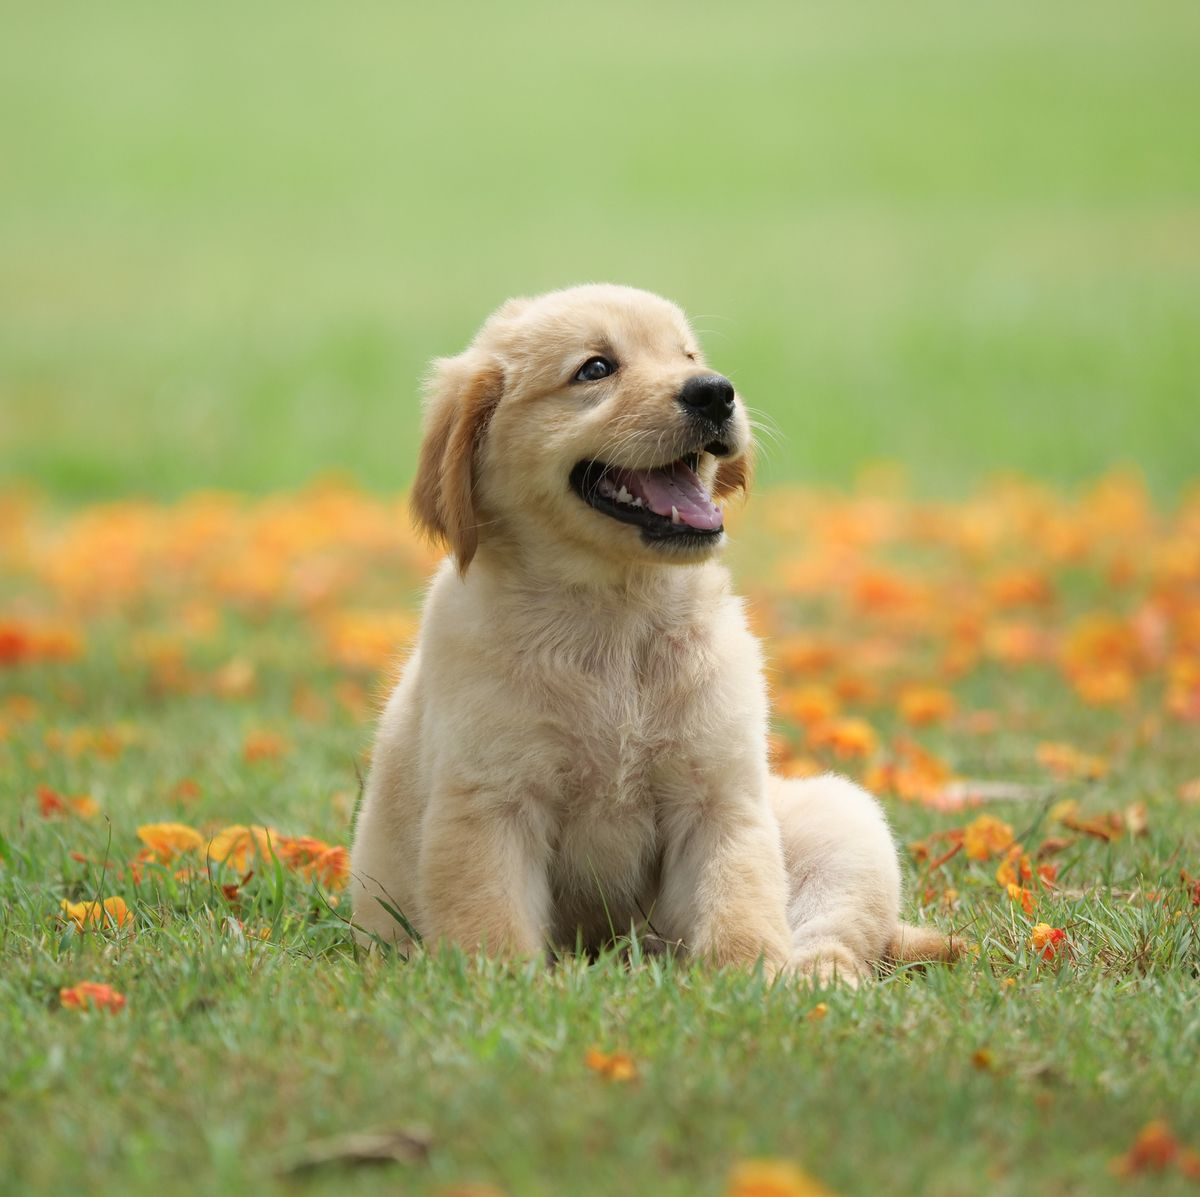

dog3


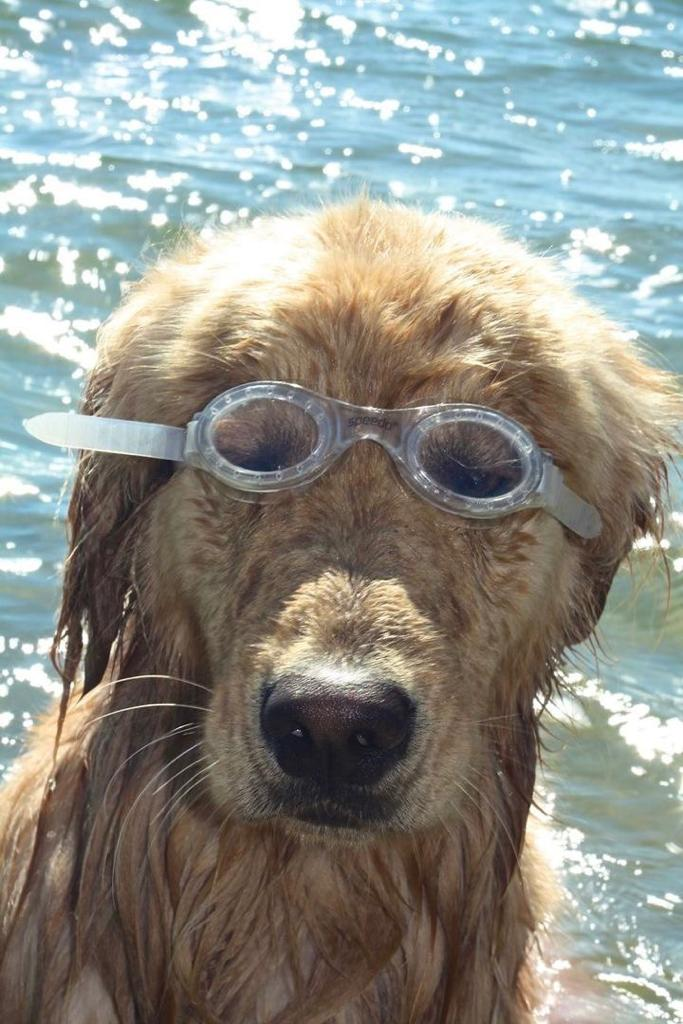

dog2


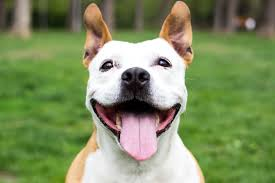

cat2


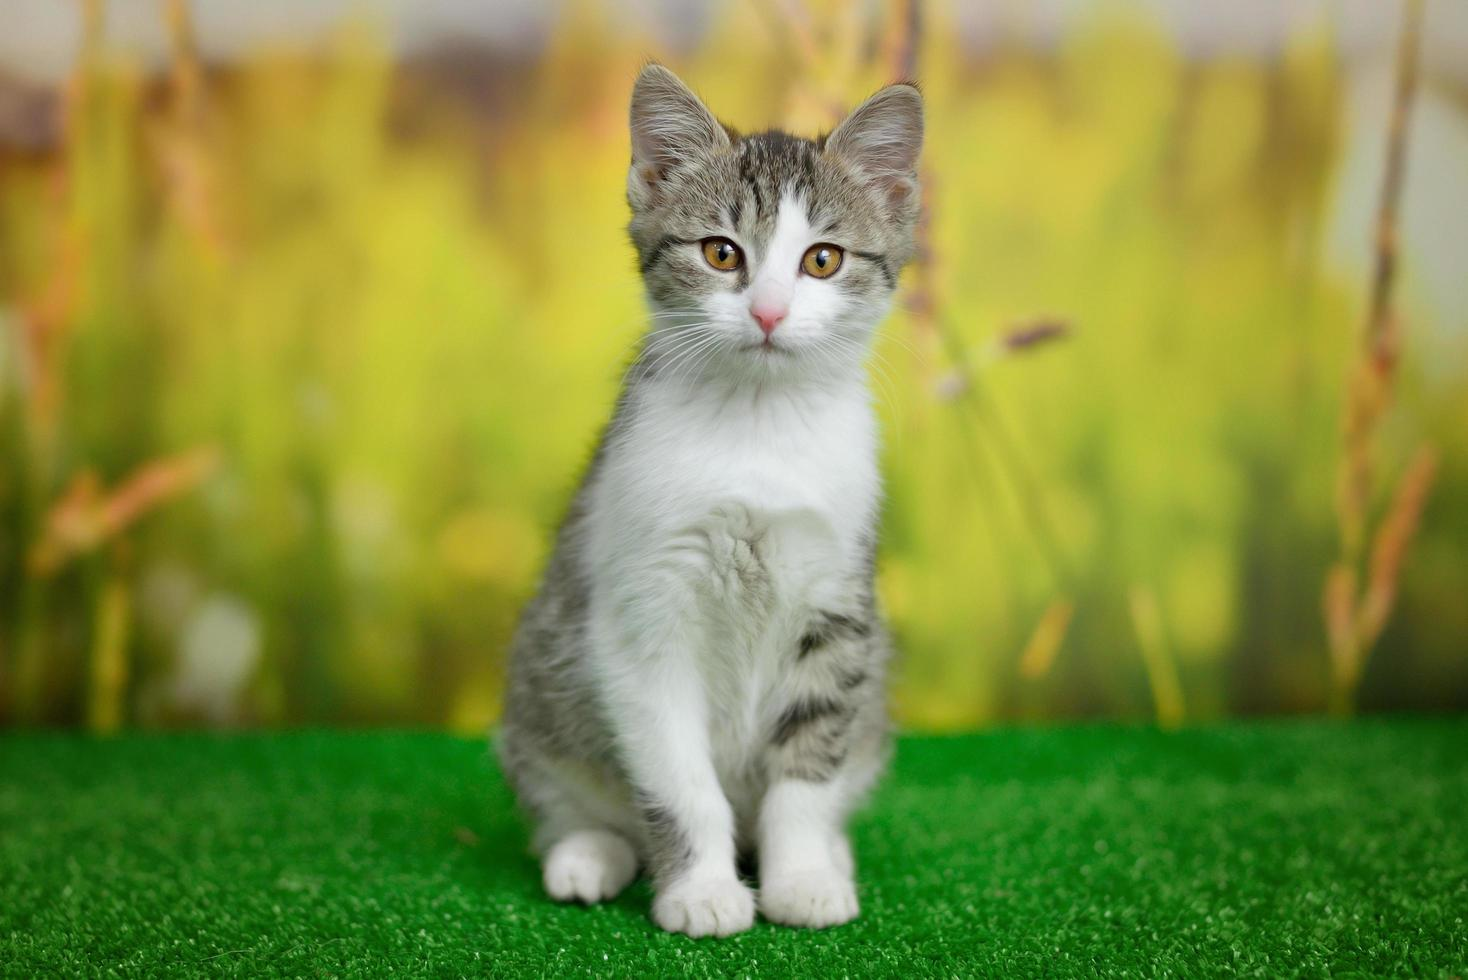

In [24]:
for i in range(0,len(results[0])):
    name = results[0][i].entity.get('words')
    print(name)
    display(Image.open('./images/'+name+'.jpg'))

In [25]:
results = image.search(
	data=[person3], 
	anns_field="embeddings", 
	param=search_params,
	limit=2, 
	expr=None,
	# set the names of the fields you want to retrieve from the search result.
	output_fields=['words'],
	consistency_level="Strong"
)

RPC error: [search], <MilvusException: (code=1, message=failed to create query plan: failed to get field schema by name: fieldName(embeddings) not found)>, <Time:{'RPC start': '2023-09-25 16:55:32.417086', 'RPC error': '2023-09-25 16:55:32.421355'}>


MilvusException: <MilvusException: (code=1, message=failed to create query plan: failed to get field schema by name: fieldName(embeddings) not found)>

dog2


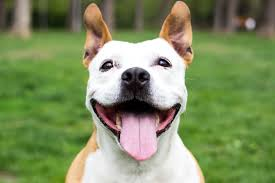

person2


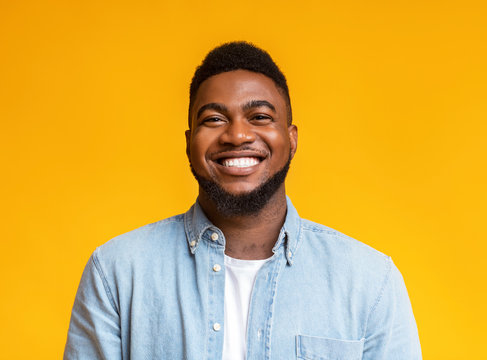

In [ ]:
for i in range(0,len(results[0])):
    name = results[0][i].entity.get('words')
    print(name)
    display(Image.open('./images/'+name+'.jpg'))


In [26]:
import gradio as gr

def create_image_embedding(image):
  try:
    image = image.convert('RGB')
    input_image = preprocess(image).unsqueeze(0)
    with torch.no_grad():
      embedding = model.encode_image(input_image).reshape(512)
      return embedding.detach().numpy()
  except Exception as e:
    print("Error:", e)
    return None

def process_image(picture):
    image_embedding = create_image_embedding(picture)
    results = image.search(
        data=[image_embedding], 
        anns_field="embeddings", 
        param=search_params,
        limit=1, 
        expr=None,
        output_fields=['words'],
        consistency_level="Strong"    )
    name = results[0][0].entity.get('words')
    return Image.open('./images/'+name+'.jpg')

title = "Image Search"
css = """.output_image, .input_image {height: 600px !important;
background-color: #000000;}
        body {background-color: #000000;}
        * {color: #ffffff;}"""
iface = gr.Interface(fn=process_image,
                     inputs=gr.inputs.Image(type="pil"),
                     outputs=gr.outputs.Image(type="pil", label="annotated image"),
                     title=title,
                     css=css)
iface.launch(debug=True)

KeyboardInterrupt: 

In [27]:
import gradio as gr
from PIL import Image
import numpy as np

def create_image_embedding(image):
  try:
    image = image.convert('RGB')
    input_image = preprocess(image).unsqueeze(0)
    with torch.no_grad():
      embedding = model.encode_image(input_image).reshape(512)
      return embedding.detach().numpy()
  except Exception as e:
    print("Error:", e)
    return None

def process_input(text=None , picture=None):
    if(picture is None and text is None):
        return None
    if(text is None):
        image_embedding = create_image_embedding(picture)
        results = image.search(
            data=[image_embedding], 
            anns_field="embeddings", 
            param=search_params,
            limit=4, 
            expr=None,
            output_fields=['words'],
            consistency_level="Strong"    )
        name = results[0][0].entity.get('words')
        return Image.open('./images/'+name+'.jpg')
    else:
        text_embedding = create_text_embedding(text)
        results = description.search(
            data=[text_embedding], 
            anns_field="description_embeddings", 
            param=search_params,
            limit=4, 
            expr=None,
            output_fields=['words'],
            consistency_level="Strong"    )
        name = results[0][0].entity.get('words')
        return Image.open('./images/'+name+'.jpg')

iface = gr.Interface(fn=process_input,
                     inputs=[gr.inputs.Textbox(lines=2), gr.inputs.Image()],
                     outputs="image")

iface.launch()

/tmp/ipykernel_6218/3836914593.py:45: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=[gr.inputs.Textbox(lines=2), gr.inputs.Image()],
/tmp/ipykernel_6218/3836914593.py:45: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=[gr.inputs.Textbox(lines=2), gr.inputs.Image()],
/tmp/ipykernel_6218/3836914593.py:45: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs=[gr.inputs.Textbox(lines=2), gr.inputs.Image()],


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [ ]:
import gradio as gr
from PIL import Image
import numpy as np

def generate_images(text, image):
    image = Image.fromarray(image)
    image1 = image
    image2 = image.rotate(90)

    # Concatenate images horizontally
    output_image = Image.new('RGB', (image.width * 3, image.height))
    output_image.paste(image1, (0, 0))
    output_image.paste(image2, (image.width, 0))

    # Return the concatenated image as a NumPy array
    return np.array(output_image)

iface = gr.Interface(fn=generate_images,
                     inputs=[gr.inputs.Textbox(lines=2), gr.inputs.Image()],
                     outputs="image")

iface.launch()


/tmp/ipykernel_6341/4256758756.py:19: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=[gr.inputs.Textbox(lines=2), gr.inputs.Image()],
/tmp/ipykernel_6341/4256758756.py:19: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=[gr.inputs.Textbox(lines=2), gr.inputs.Image()],
/tmp/ipykernel_6341/4256758756.py:19: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs=[gr.inputs.Textbox(lines=2), gr.inputs.Image()],


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
